In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import seaborn as sns
from wordcloud import WordCloud


#reading data

df = pd.read_csv("/Users/pallavi/PycharmProjects/BDAProject/RPD__Part_I_Crime_2011_to_Present.csv") #Reading the dataset in a dataframe using Pandas

#Here df is the dataframeset

#To see the info of the data frame 
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77810 entries, 0 to 77809
Data columns (total 40 columns):
X                             77351 non-null float64
Y                             77351 non-null float64
OBJECTID                      77810 non-null int64
Geocode_Address               77351 non-null object
Geocode_Street                77810 non-null object
Case_Number                   77810 non-null object
OccurredFrom_Date_Year        77810 non-null int64
OccurredFrom_Date_Month       77810 non-null int64
OccurredFrom_Time             77810 non-null int64
OccurredFrom_Timestamp        77810 non-null object
OccurredThrough_Date_Year     77810 non-null int64
OccurredThrough_Date_Month    77810 non-null int64
OccurredThrough_Time          77810 non-null int64
OccurredThrough_Timestamp     77810 non-null object
Reported_Date_Year            77810 non-null int64
Reported_Date_Month           77810 non-null int64
Reported_Time                 77810 non-null int64
Reported_Timest

In [3]:
df.columns
#To know the labels of the data set 

Index(['X', 'Y', 'OBJECTID', 'Geocode_Address', 'Geocode_Street',
       'Case_Number', 'OccurredFrom_Date_Year', 'OccurredFrom_Date_Month',
       'OccurredFrom_Time', 'OccurredFrom_Timestamp',
       'OccurredThrough_Date_Year', 'OccurredThrough_Date_Month',
       'OccurredThrough_Time', 'OccurredThrough_Timestamp',
       'Reported_Date_Year', 'Reported_Date_Month', 'Reported_Time',
       'Reported_Timestamp', 'Address_StreetFull', 'Address_City',
       'Address_State', 'Patrol_Beat', 'Patrol_Section', 'Case_Status',
       'Statute_Title', 'Statute_Section', 'Statute_Subsection',
       'Statute_Degree', 'Statute_Class', 'Statute_Category', 'Statute_Text',
       'Statute_Description', 'Statute_CrimeCategory', 'Statute_Attempted',
       'Weapon_Description', 'Larceny_Type', 'Location_Type', 'Geo_Beat',
       'Geo_Section', 'Geo_Section_Num'],
      dtype='object')

In [18]:
df.head(5)
#to know top 5 samples of the data

,X,Y,OBJECTID,Geocode_Address,Geocode_Street,Case_Number,OccurredFrom_Date_Year,OccurredFrom_Date_Month,OccurredFrom_Time,OccurredFrom_Timestamp,...,Statute_Text,Statute_Description,Statute_CrimeCategory,Statute_Attempted,Weapon_Description,Larceny_Type,Location_Type,Geo_Beat,Geo_Section,Geo_Section_Num
0,-77.626155,43.165928,2001,"147 Spencer St, Rochester, NY, 14608",147 SPENCER ST,2015-00149697,2015,6,635,2015-06-15T06:35:00.000Z,...,Larceny,Petit Larceny ...,6,Completed,* No Weapon Specified *,All Other Larcenies,Street,271.0,Lake,1.0
1,-77.583344,43.164289,2002,"136 Garson Ave, Rochester, NY, 14609",136 GARSON AVE,2017-00057032,2017,3,1323,2017-03-12T13:23:00.000Z,...,Aggravated Assault,Menacing 2nd: Weapon ...,4,Completed,Shotgun,* No Larceny Type Specified *,Yard,297.0,Clinton,7.0
2,-77.628695,43.154512,2003,"38 Jefferson Ave, Rochester, NY, 14611",38 JEFFERSON AVE,2016-00144426,2016,5,1700,2016-05-11T17:00:00.000Z,...,Larceny,Petit Larceny ...,6,Completed,* No Weapon Specified *,Theft from Building,Single Family Home,213.0,Genesee,3.0
3,-77.646162,43.127395,2004,"170 Virginia Ave, Rochester, NY, 14619",170 VIRGINIA AVE,2011-00395358,2011,12,2138,2011-12-17T21:38:00.000Z,...,Robbery,Robbery 1st: Displays What Appears To Be a Fir...,3,Completed,Semiautomatic Handgun,* No Larceny Type Specified *,Parking Lot,243.0,Genesee,3.0
4,-77.646162,43.127395,2005,"170 Virginia Ave, Rochester, NY, 14619",170 VIRGINIA AVE,2013-00364264,2013,12,1400,2013-12-23T14:00:00.000Z,...,Larceny,Petit Larceny ...,6,Completed,* No Weapon Specified *,Theft from Building,Single Family Home,243.0,Genesee,3.0


In [3]:
df.tail(5)

,X,Y,OBJECTID,Geocode_Address,Geocode_Street,Case_Number,OccurredFrom_Date_Year,OccurredFrom_Date_Month,OccurredFrom_Time,OccurredFrom_Timestamp,...,Statute_Text,Statute_Description,Statute_CrimeCategory,Statute_Attempted,Weapon_Description,Larceny_Type,Location_Type,Geo_Beat,Geo_Section,Geo_Section_Num
77805,-77.560987,43.158347,77806,"90 Indiana St, Rochester, NY, 14609",90 INDIANA ST,2014-00182890,2014,7,215,2014-07-14T02:15:00.000Z,...,Motor Vehicle Theft,Grand Larceny 4th: Motor Vehicle Value Exceeds...,7,Completed,* No Weapon Specified *,Motor Vehicle Theft,Street,235.0,Goodman,5.0
77806,-77.598251,43.137591,77807,"180 Benton St, Rochester, NY, 14620",180 BENTON ST,2014-00182364,2014,7,1030,2014-07-13T10:30:00.000Z,...,Burglary,Burglary 2nd: Illegal Entry: Dwelling ...,5,Completed,* No Weapon Specified *,* No Larceny Type Specified *,Garage/Shed,265.0,Goodman,5.0
77807,-77.603208,43.134381,77808,"71 Gregory Hill Rd, Rochester, NY, 14620",71 GREGORY HILL DR,2014-00182214,2014,7,1500,2014-07-11T15:00:00.000Z,...,Burglary,Burglary 2nd: Illegal Entry: Dwelling ...,5,Completed,* No Weapon Specified *,* No Larceny Type Specified *,Garage/Shed,265.0,Goodman,5.0
77808,-77.657203,43.160511,77809,"49 Wetmore Park, Rochester, NY, 14606",49 WETMORE PARK,2014-00181421,2014,7,2000,2014-07-11T20:00:00.000Z,...,Burglary,Burglary 2nd: Illegal Entry: Dwelling ...,5,Completed,* No Weapon Specified *,* No Larceny Type Specified *,Single Family Home,281.0,Lake,1.0
77809,-77.627913,43.191974,77810,"52 Gorsline St, Rochester, NY, 14613",52 GORSLINE ST,2014-00180673,2014,7,2129,2014-07-11T21:29:00.000Z,...,Aggravated Assault,Menacing 2nd: Weapon ...,4,Completed,Knife/Cutting Instrument,* No Larceny Type Specified *,Multiple Dwelling,231.0,Lake,1.0


In [5]:
print("Describing the features of the dataset")
df.describe()

Describing the features of the dataset


,X,Y,OBJECTID,OccurredFrom_Date_Year,OccurredFrom_Date_Month,OccurredFrom_Time,OccurredThrough_Date_Year,OccurredThrough_Date_Month,OccurredThrough_Time,Reported_Date_Year,Reported_Date_Month,Reported_Time,Statute_Section,Statute_Degree,Statute_CrimeCategory,Geo_Beat,Geo_Section_Num
count,77351.000000,77351.000000,77810.00000,77810.000000,77810.000000,77810.000000,77810.000000,77810.000000,77810.000000,77810.000000,77810.000000,77810.000000,77810.00000,77810.000000,77810.000000,77344.000000,77344.000000
mean,-77.611666,43.165020,38905.50000,2013.789898,6.725485,1348.990772,2013.795682,6.722671,1285.426333,2013.800681,6.724457,1335.464439,149.81790,1.366033,5.472317,239.288452,4.654479
std,0.026798,0.022933,22461.95656,2.048968,3.303609,669.841898,2.079465,3.304512,624.158968,2.080534,3.306603,581.914879,11.20397,1.494634,0.999729,26.064842,2.676413
min,-77.701497,43.106066,1.00000,2011.000000,1.000000,0.000000,1920.000000,1.000000,0.000000,1920.000000,1.000000,0.000000,120.00000,0.000000,1.000000,201.000000,1.000000
25%,-77.633512,43.148820,19453.25000,2012.000000,4.000000,915.000000,2012.000000,4.000000,830.000000,2012.000000,4.000000,945.000000,140.25000,0.000000,5.000000,217.000000,3.000000
50%,-77.611717,43.164002,38905.50000,2014.000000,7.000000,1430.000000,2014.000000,7.000000,1315.000000,2014.000000,7.000000,1350.000000,155.25000,1.000000,6.000000,235.000000,5.000000
75%,-77.592956,43.178657,58357.75000,2016.000000,9.000000,1900.000000,2016.000000,9.000000,1758.000000,2016.000000,9.000000,1756.000000,155.25000,2.000000,6.000000,261.000000,7.000000
max,-77.537105,43.266234,77810.00000,2018.000000,12.000000,2359.000000,2018.000000,12.000000,2359.000000,2018.000000,12.000000,2359.000000,215.51000,4.000000,7.000000,297.000000,9.000000


In [10]:
print("Checking for any Null values :")
pd.isnull(df).values.any()


Checking for any Null values :


True

In [11]:
print("Finding the count of null values in the police dataset")
pd.isnull(df).sum()



Finding the count of null values in the police dataset


X                             459
Y                             459
OBJECTID                        0
Geocode_Address               459
Geocode_Street                  0
Case_Number                     0
OccurredFrom_Date_Year          0
OccurredFrom_Date_Month         0
OccurredFrom_Time               0
OccurredFrom_Timestamp          0
OccurredThrough_Date_Year       0
OccurredThrough_Date_Month      0
OccurredThrough_Time            0
OccurredThrough_Timestamp       0
Reported_Date_Year              0
Reported_Date_Month             0
Reported_Time                   0
Reported_Timestamp              0
Address_StreetFull              0
Address_City                    0
Address_State                   0
Patrol_Beat                     0
Patrol_Section                  0
Case_Status                     0
Statute_Title                   0
Statute_Section                 0
Statute_Subsection              0
Statute_Degree                  0
Statute_Class                   0
Statute_Catego

In [13]:
print("Total count of Missing values in the police dataset")
pd.isnull(df).sum().sum()

Total count of Missing values in the police dataset


2775

In [25]:
#Extract the individual columns arrays
OccurredFrom_Date_Year=df['OccurredFrom_Date_Year']
Statute_Text=df['Statute_Text']
Weapon_Description=df['Weapon_Description']
Geocode_Street=df['Geocode_Street']
OccurredFrom_Date_Year=df['OccurredFrom_Date_Year']
print("Data Extracted :")


Data Extracted :


In [6]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
count=0;
for index, row in df.iterrows():
    if (pd.isnull(row['Geocode_Address'] )):
         location = geolocator.geocode(row['Geocode_Street'])
         if location is not None:
             latitude = location.latitude
             longitude= location.longitude
             df.set_value(index,'X',latitude)
             df.set_value(index,'Y',longitude)
             df.set_value(index,'Geocode_Address',location)
             print('Street',row['Geocode_Street'])

/Users/pallavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/Users/pallavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/Users/pallavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


Street 1 BAUSCH & LOMB PL
Street 1 BAUSCH & LOMB PL
Street 6 SAWDEY WAY
Street 100 BAUSCH LOMB PL
Street 27 ALEXSIS ST
Street 864 PITTSFORD MENDON ROAD
Street 1200 N KINGS HIGHWAY HGTS
Street 905 UNIVERSITY PARK ROAD
Street 32.5 AUSTIN ST
Street 306 UNIVERSITY PARK ROAD
Street 145 B GIBBS ST
Street 15 HUBBLE PARK
Street 33 WEDGEWOOD PARK
Street 239 SENECA PK WAY
Street 1 BAUSCH & LOMB PL
Street 1 BAUSCH & LOMB PL
Street 10 CAIRNS ST
Street HOLLENBECK / AVE D
Street 1000 N KINGS HWY
Street 28 BURWICK ROAD
Street 51 A ROWLEY ST
Street 44 SYKES ST
Street 77 SENECA PARK WAY
Street UNKNOWN
Street 444 SWEET ACRES DR
Street 1000 HENRIETTA RD E  
Street 17 N WINTON ROAD
Street 231 ARBORWOOD LA  
Street 940 WINTON N ROAD
Street 311 ARBORWOOD LA  
Street 8 LUNSFORD LA  
Street 155 BUELL RD  
Street 1 BAUSCH & LOMB PL
Street 1 BAUSCH & LOMB PL
Street 0 BROAD ST E  
Street 2400 HENRIETTA RD W  
Street 76 NORTON VILLAGE LA  
Street 82 C DODGE ST
Street 47 REAR GLASGOW ST
Street 297 REAR WEAVER ST
S

Street 333 ` WEST AVE
Street 5 BROCKTON ST
Street 226 TERRACE PARK ST
Street 319 ALFONSO DR
Total count : 0


In [7]:
print("Check the missing values after replaceing the longitude and latitude: ")
pd.isnull(df).sum()

Check the missing values after replaceing the longitude and latitude: 


X                             123
Y                             123
OBJECTID                        0
Geocode_Address               123
Geocode_Street                  0
Case_Number                     0
OccurredFrom_Date_Year          0
OccurredFrom_Date_Month         0
OccurredFrom_Time               0
OccurredFrom_Timestamp          0
OccurredThrough_Date_Year       0
OccurredThrough_Date_Month      0
OccurredThrough_Time            0
OccurredThrough_Timestamp       0
Reported_Date_Year              0
Reported_Date_Month             0
Reported_Time                   0
Reported_Timestamp              0
Address_StreetFull              0
Address_City                    0
Address_State                   0
Patrol_Beat                     0
Patrol_Section                  0
Case_Status                     0
Statute_Title                   0
Statute_Section                 0
Statute_Subsection              0
Statute_Degree                  0
Statute_Class                   0
Statute_Catego

Total Crimes :  7
Larceny               46136
Burglary              15244
Aggravated Assault     6541
Robbery                5294
Name: Statute_Text, dtype: int64


/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


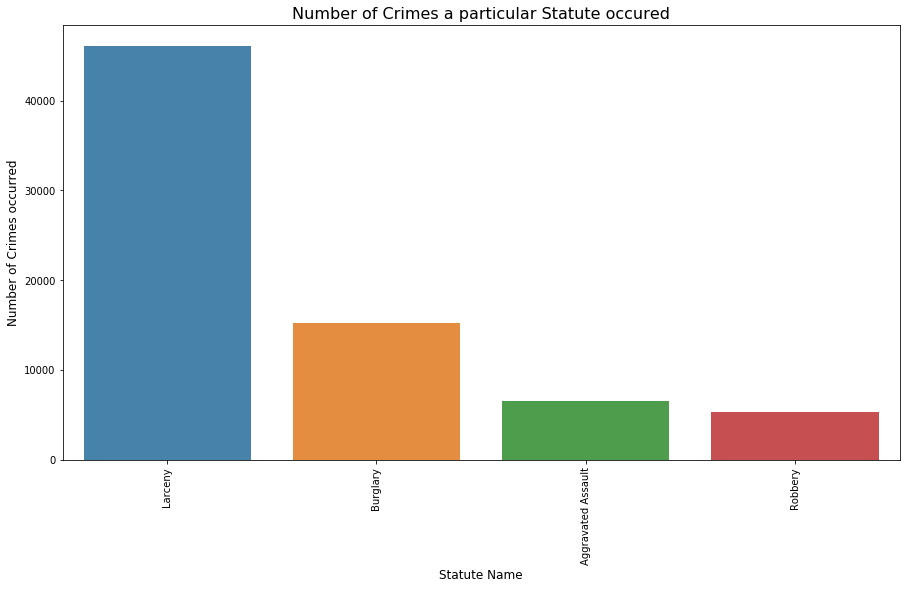

In [61]:
print("Total Crimes : ", len(Statute_Text.unique()))
print(Statute_Text.value_counts().head(4))
crime_name = Statute_Text.value_counts().head(4)
plt.figure(figsize=(15,8))
sns.barplot(x=crime_name.index,y=crime_name.values,alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Statute Name', fontsize=12)
plt.ylabel('Number of Crimes occurred', fontsize=12)
plt.title("Number of Crimes a particular Statute occured", fontsize=16)
plt.show()




Total Crimes :  24
* No Weapon Specified *     66620
Knife/Cutting Instrument     3376
Firearm                      2215
Semiautomatic Handgun        1375
Name: Weapon_Description, dtype: int64


/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


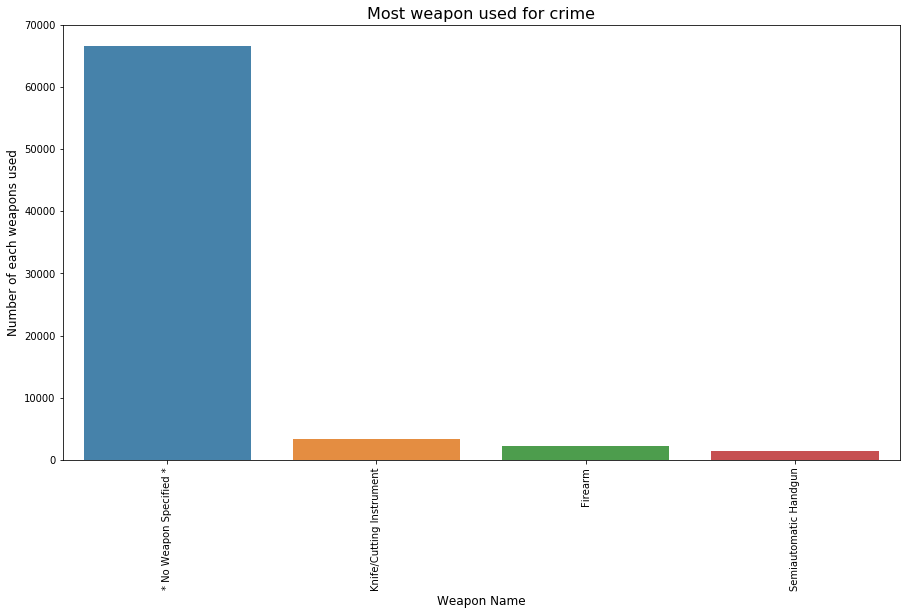

In [62]:
print("Total Crimes : ", len(Weapon_Description.unique()))
print(Weapon_Description.value_counts().head(4))
weapon_name = Weapon_Description.value_counts().head(4)
plt.figure(figsize=(15,8))
sns.barplot(x=weapon_name.index,y=weapon_name.values,alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Weapon Name', fontsize=12)
plt.ylabel('Number of each weapons used', fontsize=12)
plt.title("Most weapon used for crime", fontsize=16)
plt.show()



Total street:  33051
1490 HUDSON AVE             1805
601 ELMWOOD AVE             1135
710 LAKE AVE                 644
285 UPPER FALLS BLVD         612
500 JOSEPH C WILSON BLVD     592
450 WEST AVE                 492
1750 EAST AVE                360
Name: Geocode_Street, dtype: int64


/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


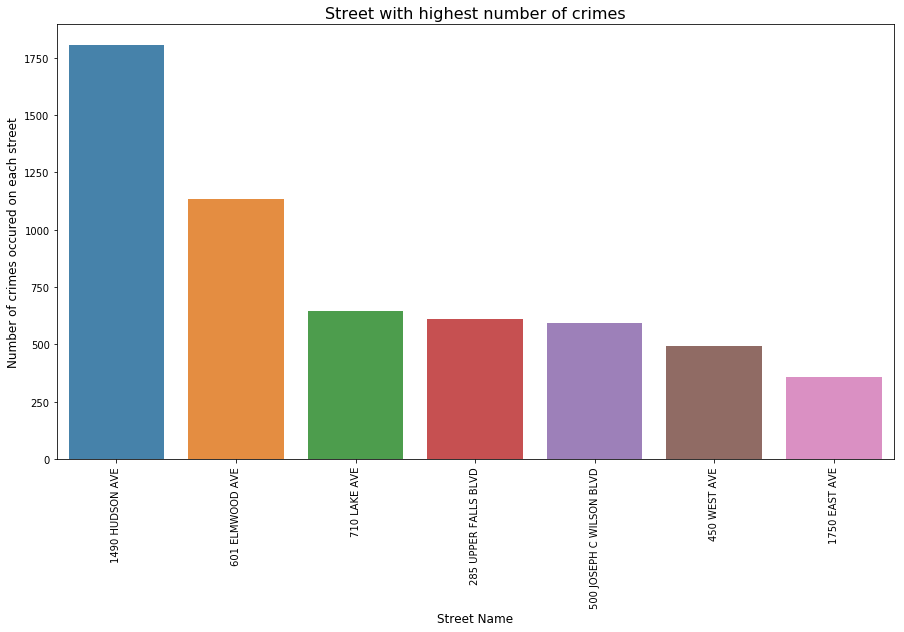

In [67]:
print("Total street: ", len(Geocode_Street.unique()))
print(Geocode_Street.value_counts().head(7))
Geocode_Street_name = Geocode_Street.value_counts().head(7)
plt.figure(figsize=(15,8))
sns.barplot(x=Geocode_Street_name.index,y=Geocode_Street_name.values,alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Street Name', fontsize=12)
plt.ylabel('Number of crimes occured on each street', fontsize=12)
plt.title("Street with highest number of crimes", fontsize=16)
plt.show()



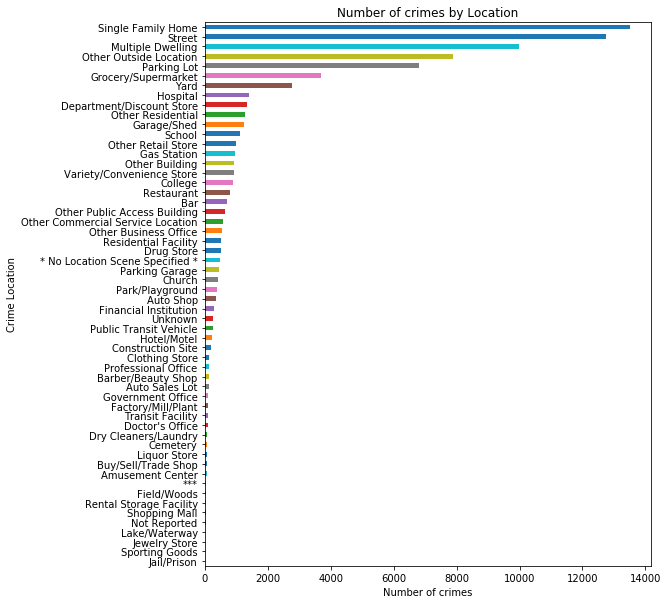

In [26]:
plt.figure(figsize=(8,10))
df.groupby([df['Location_Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()


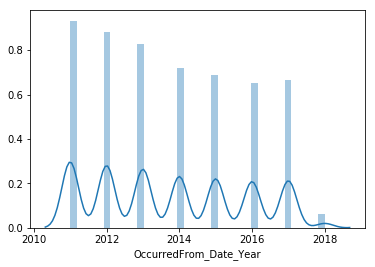

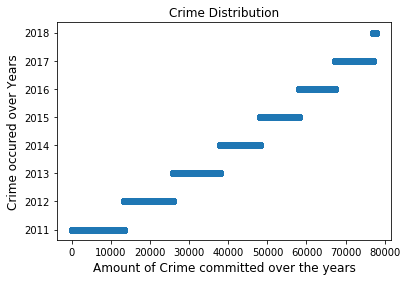

In [26]:
# Distribution of Crime 
sns.distplot(OccurredFrom_Date_Year)
plt.show() 
sortedlist=np.sort(OccurredFrom_Date_Year.values)
plt.scatter(range(df.shape[0]), sortedlist)
plt.xlabel('Amount of Crime committed over the years', fontsize=12)
plt.ylabel('Crime occured over Years', fontsize=12)
plt.title("Crime Distribution")
plt.show()

Total Case Status:  9


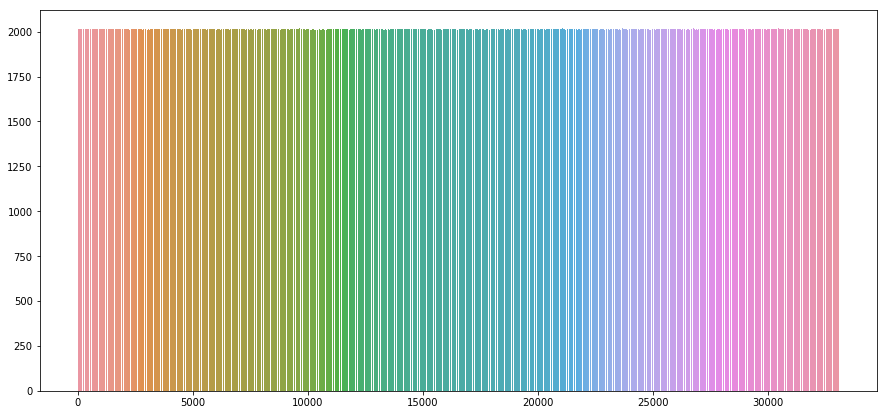

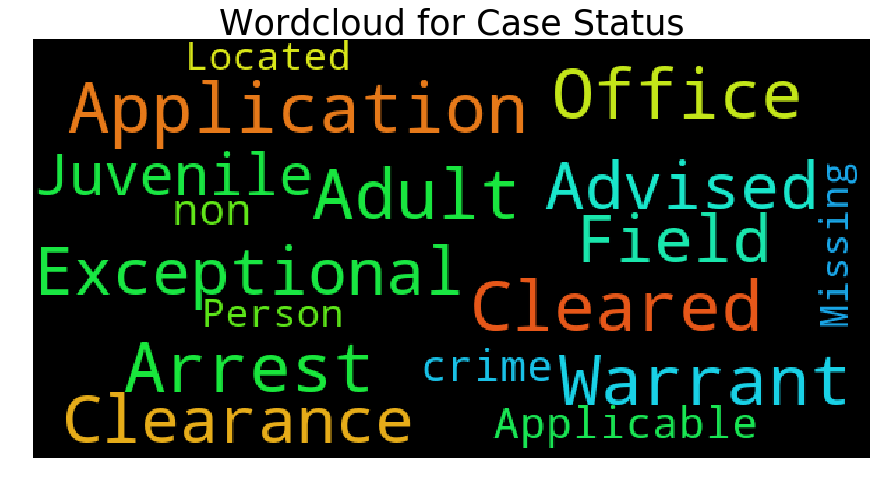

In [12]:
names = df["Case_Status"][~pd.isnull(df["Case_Status"])]
print("Total Case Status: ", len(Case_Status.unique()))
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Case Status", fontsize=35)
plt.axis("off")
plt.show()

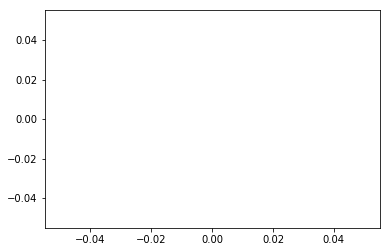

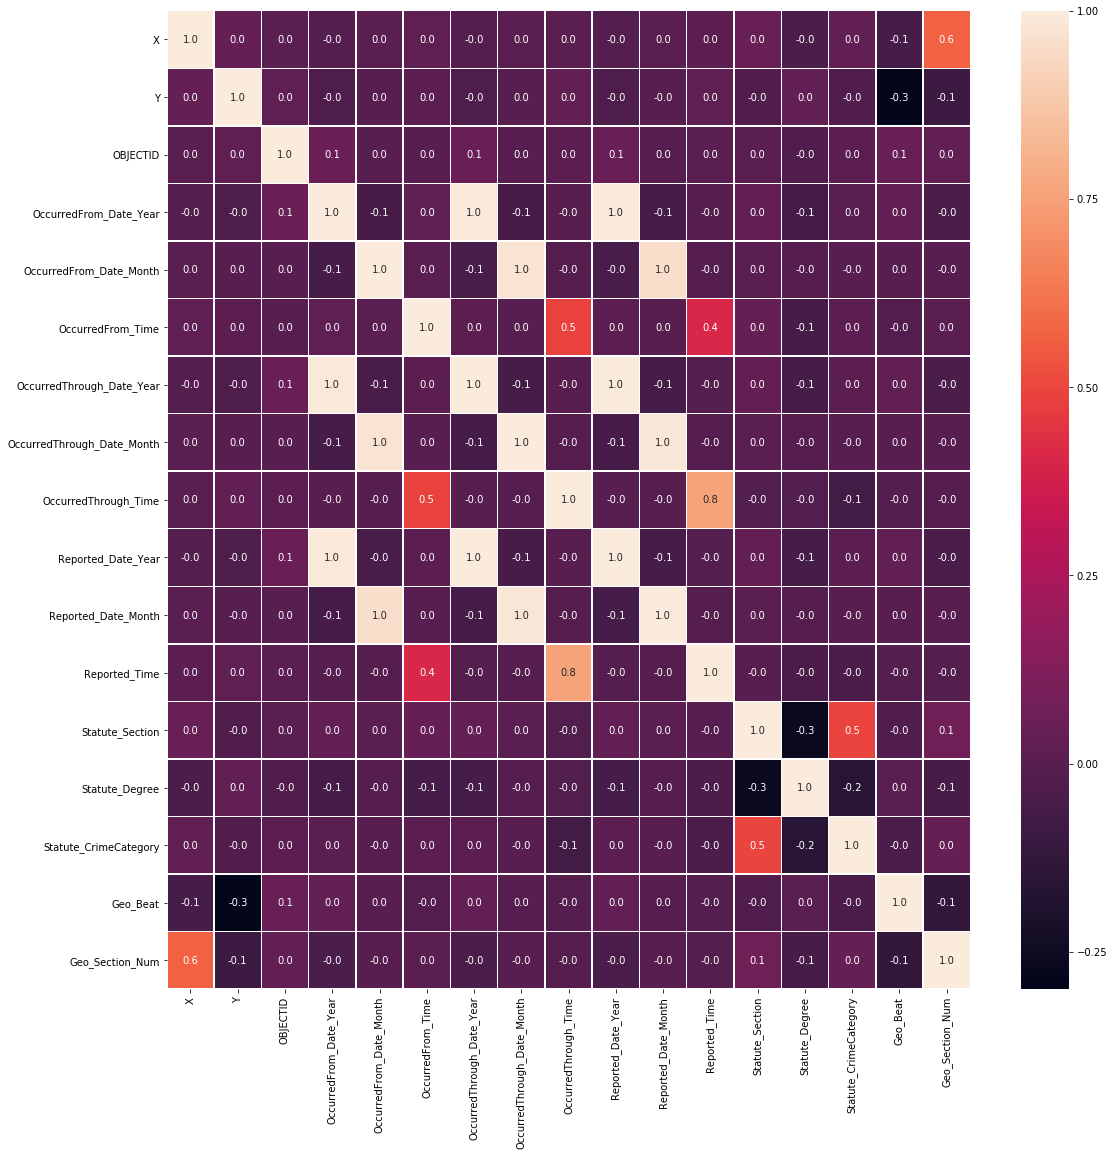

In [15]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [9]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,X,Y,OBJECTID,OccurredFrom_Date_Year,OccurredFrom_Date_Month,OccurredFrom_Time,OccurredThrough_Date_Year,OccurredThrough_Date_Month,OccurredThrough_Time,Reported_Date_Year,Reported_Date_Month,Reported_Time,Statute_Section,Statute_Degree,Statute_CrimeCategory,Geo_Beat,Geo_Section_Num
0,-77.626155,43.165928,2001,2015,6,635,2015,6,640,2015,6,829,155.25,0,6,271.0,1.0
1,-77.583344,43.164289,2002,2017,3,1323,2017,3,1323,2017,3,1323,120.14,2,4,297.0,7.0
2,-77.628695,43.154512,2003,2016,5,1700,2016,6,1630,2016,6,1247,155.25,0,6,213.0,3.0
3,-77.646162,43.127395,2004,2011,12,2138,2011,12,2139,2011,12,2139,160.15,1,3,243.0,3.0
4,-77.646162,43.127395,2005,2013,12,1400,2013,12,1500,2013,12,1725,155.25,0,6,243.0,3.0


Numerical distribution of the dataset


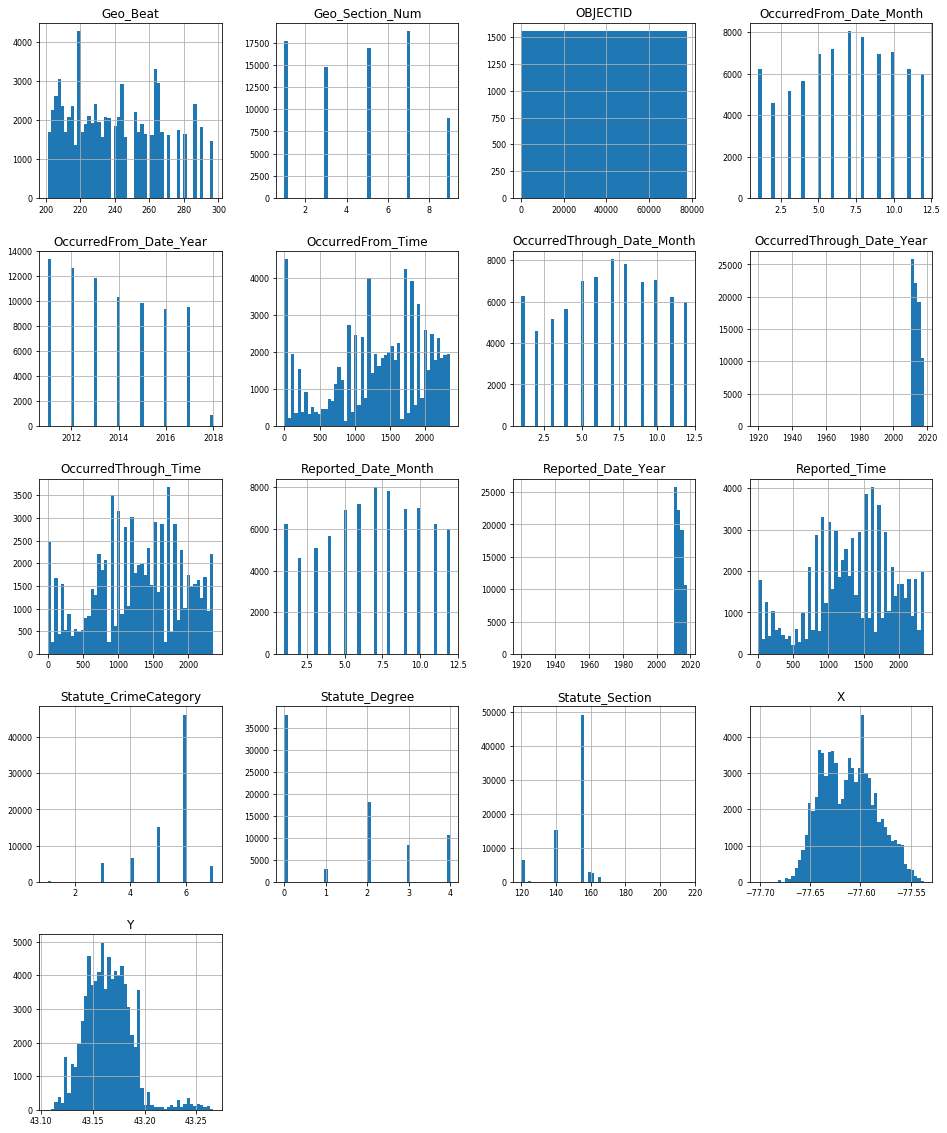

In [11]:
print('Numerical distribution of the dataset')
plt.figure(figsize=(9, 8))
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations
plt.show()

/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


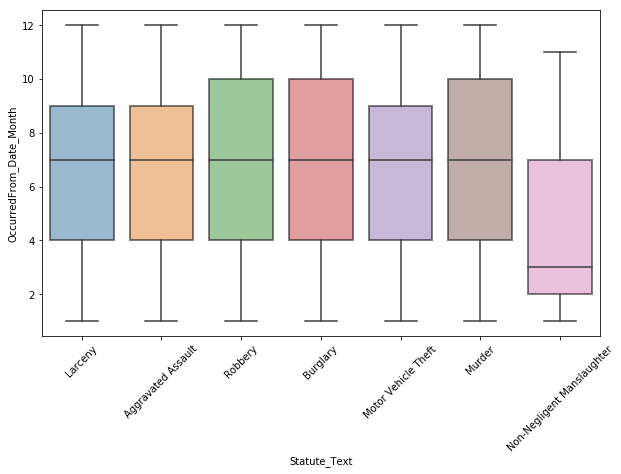

In [20]:
# plt.scatter(df[''], df[''], cmap = 'viridis')
# plt.show()

plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Statute_Text', y='OccurredFrom_Date_Month', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.show()


/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


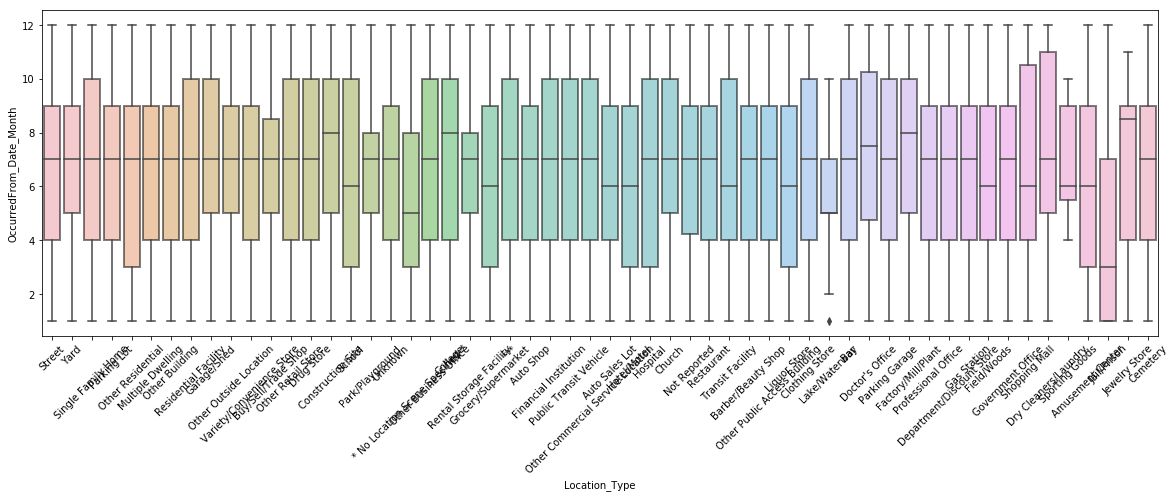

In [24]:
plt.figure(figsize = (20, 6))
ax = sns.boxplot(x='Location_Type', y='OccurredFrom_Date_Month', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.show()

/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


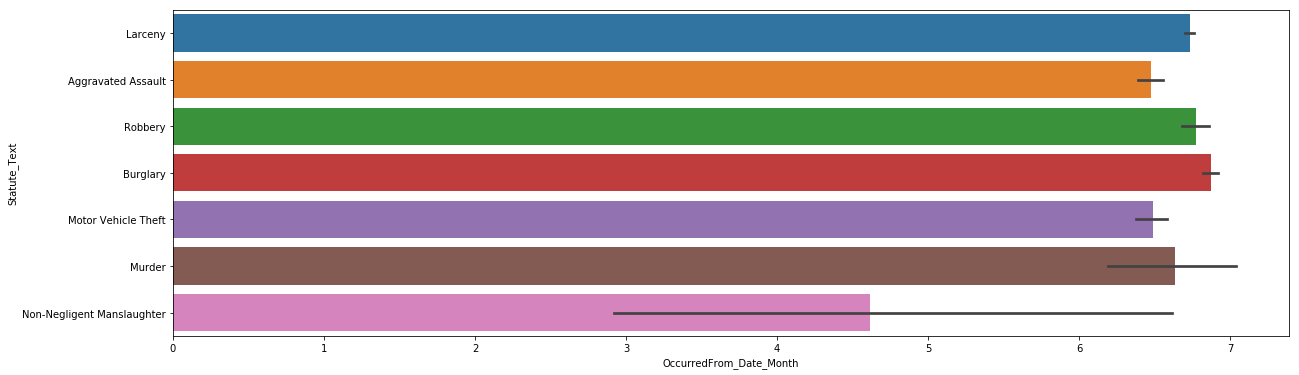

In [32]:
plt.figure(figsize = (20, 6))
ax = sns.barplot(x='OccurredFrom_Date_Month', y='Statute_Text', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.show()